1. Load and Evaluate Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
import pickle
import warnings
warnings.filterwarnings('ignore')

def load_and_evaluate_model(X_test, y_test, model_path='random_forest_model.pkl'):
    """
    Load the saved model and evaluate it on test data.
    """
    try:
        # Load the model
        with open(model_path, 'rb') as file:
            model = pickle.load(file)

        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Evaluation Metrics
        print("Model Evaluation Metrics:")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
        print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.2f}")
        print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.2f}")
        print(f"F1 Score: {f1_score(y_test, y_pred, zero_division=0):.2f}\n")

        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
        plt.title("Confusion Matrix")
        plt.ylabel("Actual")
        plt.xlabel("Predicted")
        plt.show()

        return model, y_pred, y_pred_proba

    except FileNotFoundError:
        print(f"Error: Model file not found at {model_path}.")
        return None, None, None
    except Exception as e:
        print(f"Error during model evaluation: {str(e)}")
        return None, None, None


2. Evaluate Model Metrics

In [ ]:
def evaluate_model_metrics(true_labels, predicted_labels, predicted_probabilities):
    # Calculate key performance metrics
    metrics_dict = {
        'Accuracy': accuracy_score(true_labels, predicted_labels),
        'Precision': precision_score(true_labels, predicted_labels),
        'Recall': recall_score(true_labels, predicted_labels),
        'F1-Score': f1_score(true_labels, predicted_labels)
    }

    # Display the metrics
    print("\nModel Performance Evaluation: ")
    print("=" * 50)
    for metric_name, metric_value in metrics_dict.items():
        print(f"{metric_name}: {metric_value:.4f}")

    return metrics_dict


3. Visualize Performance Metrics

In [ ]:
def visualize_metrics(metrics, y_true, y_pred):
    """Create visualizations for model performance"""
    # 1. Bar plot of metrics
    plt.figure(figsize=(10, 6))
    plt.bar(metrics.keys(), metrics.values())
    plt.title('Model Performance Metrics')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return cm


4. Analyze Errors

In [ ]:
def analyze_errors(X_test, y_true, y_pred, y_pred_proba):
    """Analyze misclassifications and their patterns"""
    # Create DataFrame with actual and predicted values
    error_analysis = pd.DataFrame({
        'Actual': y_true,
        'Predicted': y_pred,
        'Probability': y_pred_proba
    })

    # Add original features
    error_analysis = pd.concat([error_analysis, X_test.reset_index(drop=True)], axis=1)

    # Identify misclassifications
    misclassified = error_analysis[error_analysis['Actual'] != error_analysis['Predicted']]

    print("\nError Analysis:")
    print("=" * 50)
    print(f"Total samples: {len(y_true)}")
    print(f"Correctly classified: {len(y_true) - len(misclassified)}")
    print(f"Misclassified: {len(misclassified)}")

    # Analyze patterns in misclassifications
    print("\nMisclassification Patterns:")
    print("-" * 50)

    # 1. Transaction Type Analysis
    print("\nMisclassifications by Transaction Type:")
    type_errors = misclassified['type'].value_counts()
    for t_type, count in type_errors.items():
        print(f"Type {t_type}: {count} errors")

    # 2. Amount Range Analysis
    print("\nAmount Ranges in Misclassified Cases:")
    misclassified['amount_range'] = pd.qcut(misclassified['amount'],
                                          q=4, labels=['Low', 'Medium', 'High', 'Very High'])
    amount_errors = misclassified['amount_range'].value_counts()
    print(amount_errors)

    # Visualize error patterns
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Actual', y='amount', data=misclassified)
    plt.title('Amount Distribution in Misclassified Cases')
    plt.show()

    return misclassified


5. Main Execution

Model Evaluation Metrics:
Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1 Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1232
           1       0.99      1.00      0.99      1232

    accuracy                           0.99      2464
   macro avg       0.99      0.99      0.99      2464
weighted avg       0.99      0.99      0.99      2464



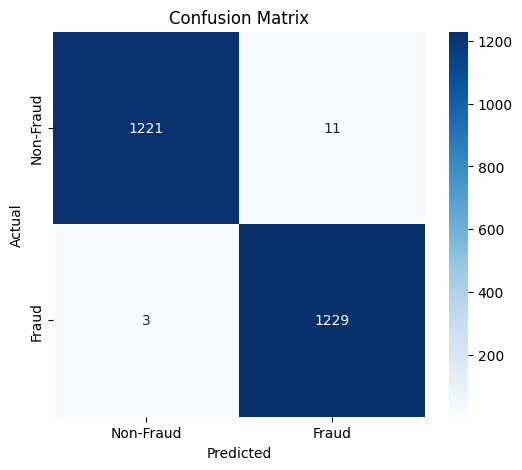


Model Performance Evaluation: 
Accuracy: 0.9943
Precision: 0.9911
Recall: 0.9976
F1-Score: 0.9943


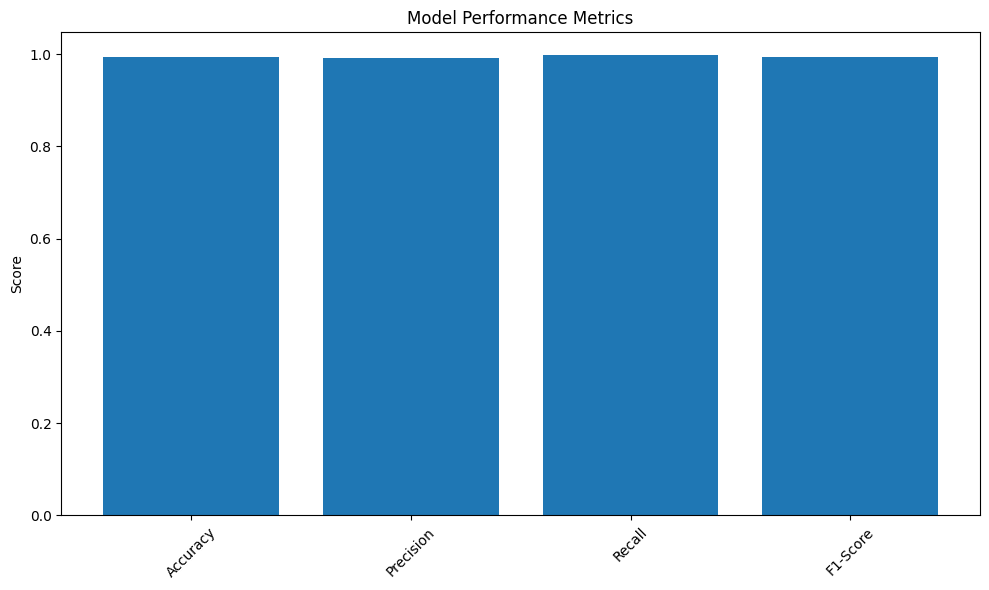

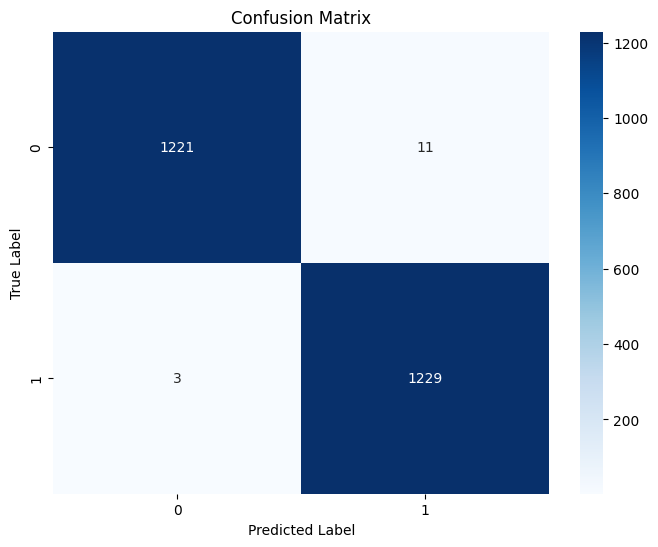


Error Analysis:
Total samples: 2464
Correctly classified: 2450
Misclassified: 14

Misclassification Patterns:
--------------------------------------------------

Misclassifications by Transaction Type:
Type 1: 13 errors
Type 4: 1 errors

Amount Ranges in Misclassified Cases:
amount_range
Low          4
Very High    4
Medium       3
High         3
Name: count, dtype: int64


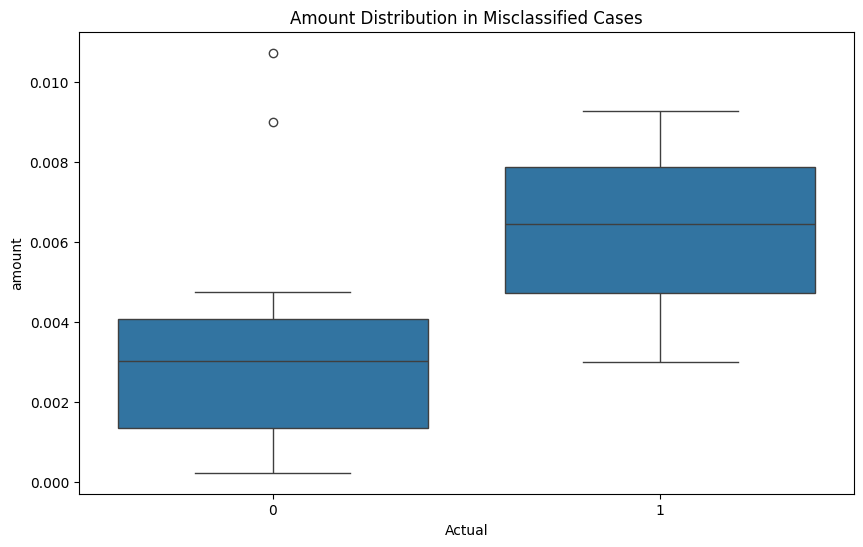


Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1232
           1       0.99      1.00      0.99      1232

    accuracy                           0.99      2464
   macro avg       0.99      0.99      0.99      2464
weighted avg       0.99      0.99      0.99      2464



In [ ]:
if __name__ == "__main__":
    # Load test data
    try:
        X_test = pd.read_csv('test_features.csv')
        y_test = pd.read_csv('test_labels.csv').values.ravel()

        # Task 1: Load model and make predictions
        model, y_pred, y_pred_proba = load_and_evaluate_model(X_test, y_test)

        if model is not None:
            # Task 2: Calculate metrics
            metrics = evaluate_model_metrics(y_test, y_pred, y_pred_proba)

            # Task 3: Visualize performance
            cm = visualize_metrics(metrics, y_test, y_pred)

            # Task 4: Analyze errors
            misclassified = analyze_errors(X_test, y_test, y_pred, y_pred_proba)

            print("\nDetailed Classification Report:")
            print(classification_report(y_test, y_pred))

    except Exception as e:
        print(f"Error in model evaluation process: {str(e)}")
